In [14]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('expenditure_for_cancer_care.csv', header = 3)

print(df.head())

print('features:', df.columns)

  Cancer Site  Year         Sex       Age  \
0    AllSites  2010  Both sexes  All ages   
1    AllSites  2010  Both sexes  All ages   
2    AllSites  2010  Both sexes  All ages   
3    AllSites  2010  Both sexes  All ages   
4    AllSites  2010  Both sexes  All ages   

                  Incidence and Survival Assumptions  \
0               Incidence, Survival at constant rate   
1  Incidence follows recent trend, Survival constant   
2  Survival follows recent trend, Incidence constant   
3           Incidence, Survival follow recent trends   
4           Incidence, Survival follow recent trends   

  Annual Cost Increase (applied to initial and last phases)  Total Costs  \
0                                                 0%            124565.6   
1                                                 0%            122420.8   
2                                                 0%            125397.7   
3                                                 0%            123236.3   
4           

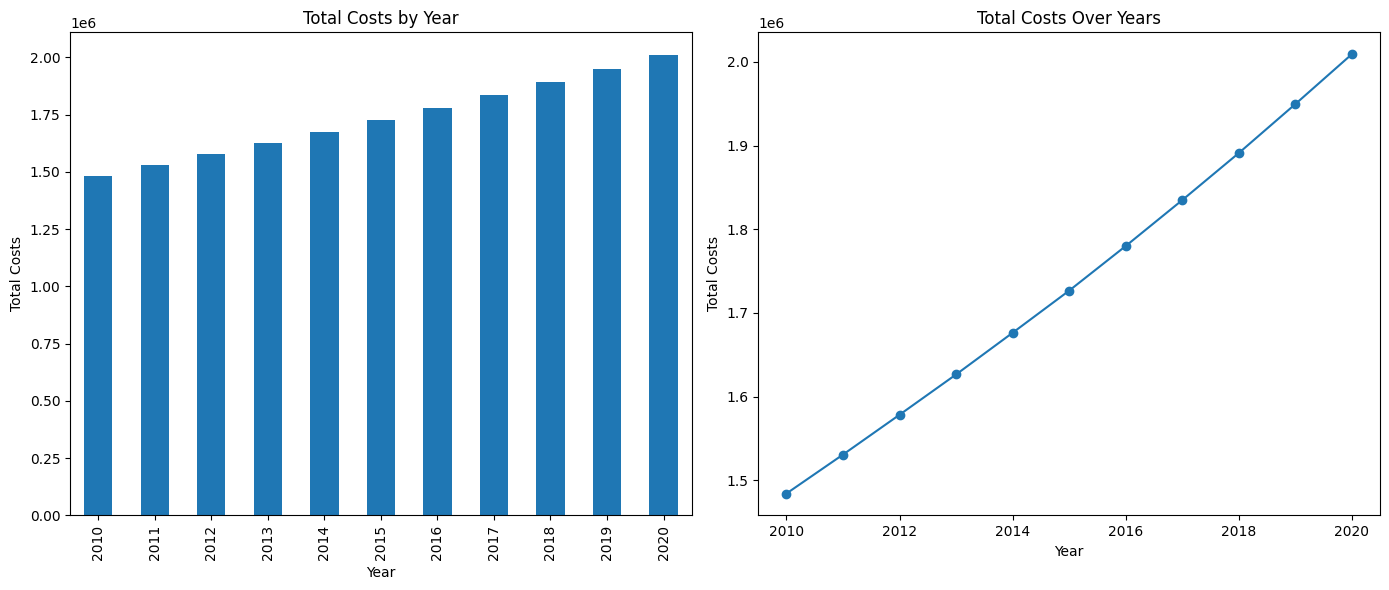

In [15]:


plt.figure(figsize = (14, 6))

# Bar Chart
plt.subplot(1, 2, 1)
df.groupby('Year')['Total Costs'].sum().plot(kind='bar')
plt.title('Total Costs by Year')
plt.xlabel('Year')
plt.ylabel('Total Costs')

# Line Chart
plt.subplot(1, 2, 2)
df.groupby('Year')['Total Costs'].sum().plot(kind='line', marker='o')
plt.title('Total Costs Over Years')
plt.xlabel('Year')
plt.ylabel('Total Costs')

plt.tight_layout()
plt.show()





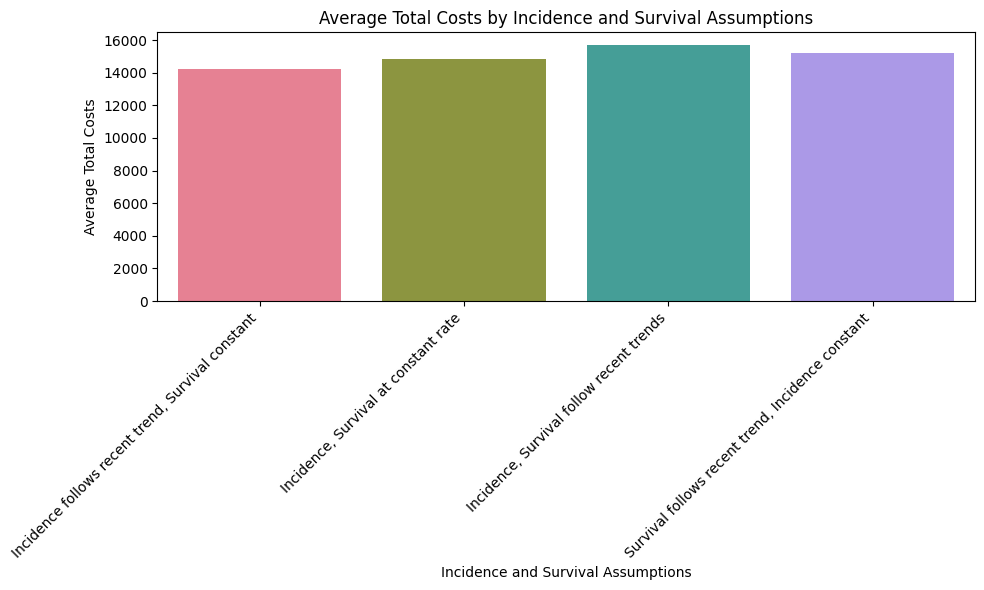

In [ ]:
grouped_data = df.groupby('Incidence and Survival Assumptions')['Total Costs'].mean().reset_index()


unique = grouped_data['Incidence and Survival Assumptions'].unique()
palette = sns.color_palette("husl", len(unique)) 
color_map = dict(zip(unique, palette))

plt.figure(figsize=(10, 6))


sns.barplot(
    data=grouped_data,
    x='Incidence and Survival Assumptions',
    y='Total Costs',
    hue='Incidence and Survival Assumptions',
    palette=color_map,
    legend=False
)

plt.xlabel("Incidence and Survival Assumptions")
plt.ylabel("Average Total Costs")
plt.title("Average Total Costs by Incidence and Survival Assumptions")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

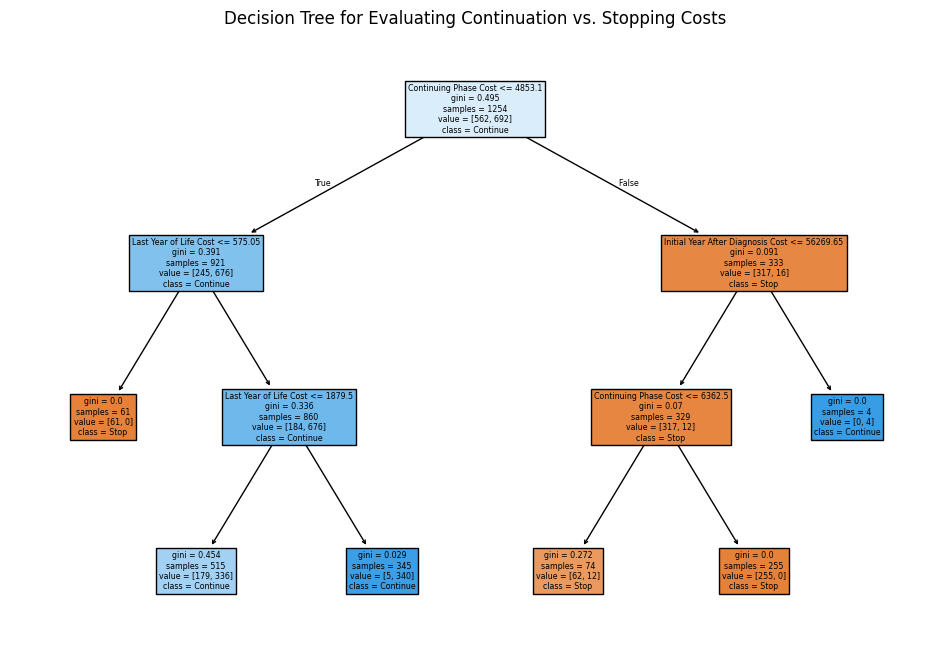

In [17]:
X = df[['Initial Year After Diagnosis Cost', 'Continuing Phase Cost', 'Last Year of Life Cost']]
y = (df['Continuing Phase Cost'] < df['Last Year of Life Cost']).astype(int)  


tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Stop', 'Continue'], filled=True)
plt.title('Decision Tree for Evaluating Continuation vs. Stopping Costs')
plt.show()



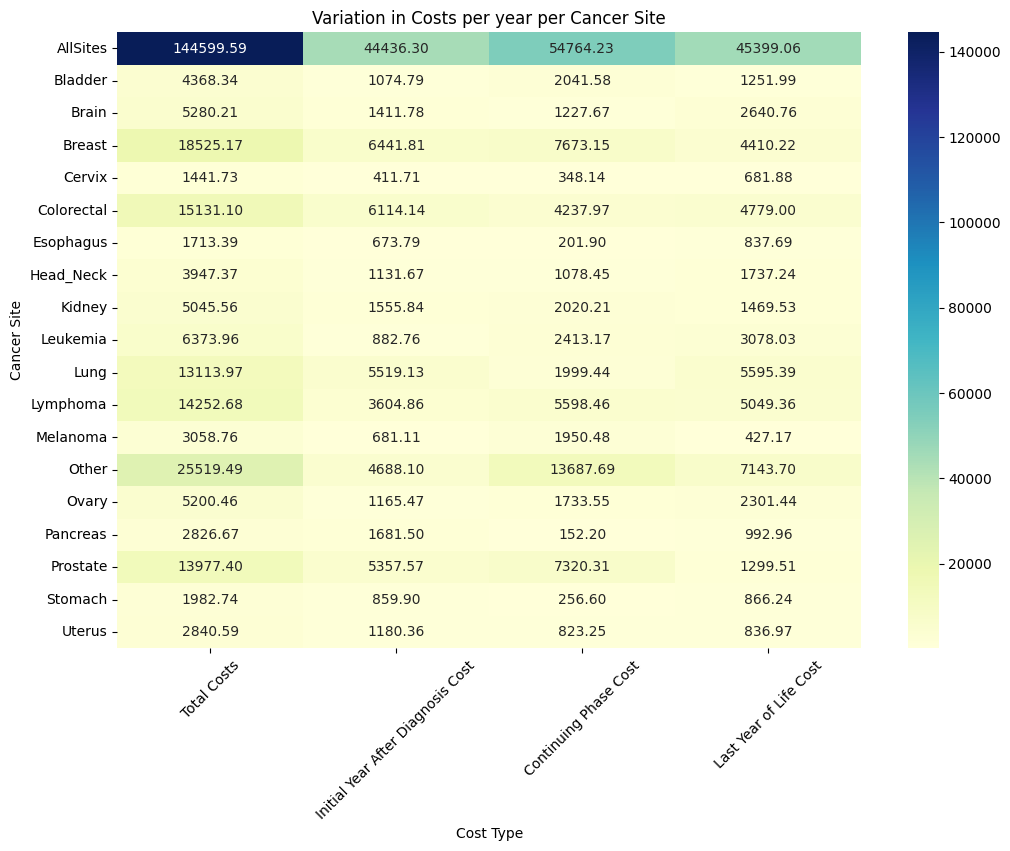

In [18]:
heatmap_data = df.groupby('Cancer Site')[['Total Costs', 'Initial Year After Diagnosis Cost', 
                                           'Continuing Phase Cost', 'Last Year of Life Cost']].mean()


heatmap_data.reset_index(inplace=True)


heatmap_data.set_index('Cancer Site', inplace=True)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title('Variation in Costs per year per Cancer Site')
plt.xlabel('Cost Type')
plt.xticks(rotation=45) 
plt.ylabel('Cancer Site')
plt.show()